In [1]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()

In [2]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [3]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
#creating datfrmae
df = pd.DataFrame(iris.data, columns= iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [6]:
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [7]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [8]:
df[df.target ==1].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1


In [9]:
#from one column generate onther
#for value in target --1,2,3, it will take from target names wiht respective target names
df['flower_name'] = df.target.apply(lambda x: iris.target_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,"[setosa, versicolor, virginica]"
1,4.9,3.0,1.4,0.2,0,"[setosa, versicolor, virginica]"
2,4.7,3.2,1.3,0.2,0,"[setosa, versicolor, virginica]"
3,4.6,3.1,1.5,0.2,0,"[setosa, versicolor, virginica]"
4,5.0,3.6,1.4,0.2,0,"[setosa, versicolor, virginica]"


In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
df0 = df[df.target ==0]
df1 = df[df.target ==1]
df2 = df[df.target ==2]

In [12]:
df0.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,"[setosa, versicolor, virginica]"
1,4.9,3.0,1.4,0.2,0,"[setosa, versicolor, virginica]"
2,4.7,3.2,1.3,0.2,0,"[setosa, versicolor, virginica]"
3,4.6,3.1,1.5,0.2,0,"[setosa, versicolor, virginica]"
4,5.0,3.6,1.4,0.2,0,"[setosa, versicolor, virginica]"


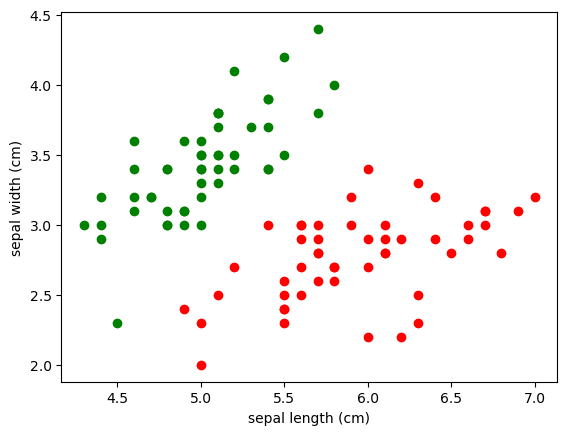

In [13]:
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'],color='green')
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'],color='red')

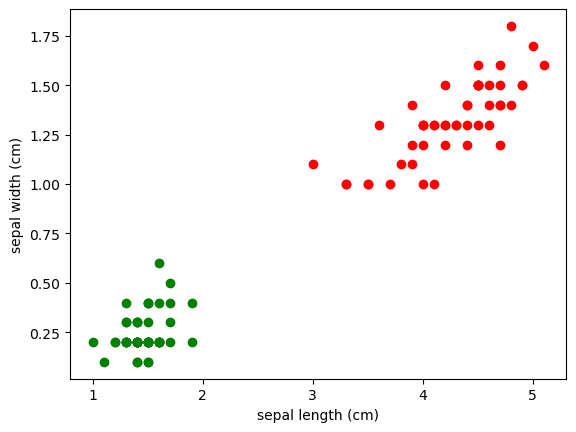

In [14]:
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.scatter(df0['petal length (cm)'], df0['petal width (cm)'],color='green')
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'],color='red')

In [15]:
from sklearn.model_selection import train_test_split


In [16]:
x = df.drop(['target','flower_name'], axis='columns')
x.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [17]:
y = df.target
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int32

In [18]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [19]:
len(x_train)

120

In [21]:
len(x_test)


30

In [29]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [30]:
#By changing the value of n_neighbors we can get different score
knn.score(x_test,y_test)

1.0

In [32]:
#to show confusion matrixx
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(x_test)

cm = confusion_matrix(y_test,y_pred)
cm

array([[12,  0,  0],
       [ 0, 10,  0],
       [ 0,  0,  8]], dtype=int64)

Text(58.222222222222214, 0.5, 'Truth')

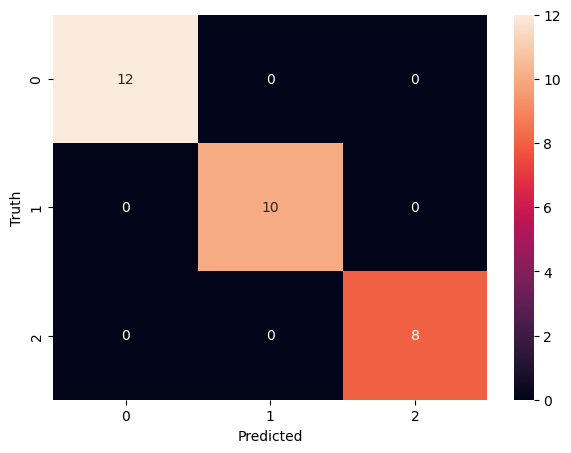

In [33]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(7,5))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

# classification Report

In [34]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00         8

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

